# Project Problem Statement

### Customer Churn Prediction:
A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.

### Data Dictionary
There are multiple variables in the dataset which can be cleanly divided into 3 categories:

#### I. Demographic information about customers
- 	customer_id - Customer id 
- 	vintage - Vintage of the customer with the bank in a number of days 
- 	age - Age of customer 
- 	gender - Gender of customer 
- 	dependents - Number of dependents 
- 	occupation - Occupation of the customer 
-	city - City of the customer (anonymized) 

#### II. Customer Bank Relationship
- 	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
- 	branch_code - Branch Code for a customer account 
- 	days_since_last_transaction - No of Days Since Last Credit in Last 1 year 

#### III. Transactional Information
- 	current_balance - Balance as of today 
- 	previous_month_end_balance - End of Month Balance of previous month 
- 	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
- 	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
- 	current_month_credit - Total Credit Amount current month 
- 	previous_month_credit - Total Credit Amount previous month 
- 	current_month_debit - Total Debit Amount current month 
- 	previous_month_debit - Total Debit Amount previous month 
- 	current_month_balance - Average Balance of current month 
- 	previous_month_balance - Average Balance of previous month 
- 	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('churn_prediction.csv')

In [3]:
df.shape

(28382, 21)

In [4]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [6]:
df.describe(include = 'all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [8]:
df['customer_id'].value_counts()

2047     1
3403     1
15661    1
9518     1
21824    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: customer_id, Length: 28382, dtype: int64

- Since every customer is unique, therefore no use of customer ID

In [9]:
df.drop(['customer_id'], axis = 1, inplace = True)

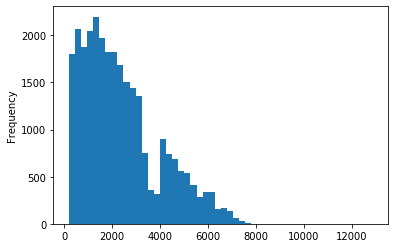

In [10]:
df['vintage'].plot.hist(bins = 50)

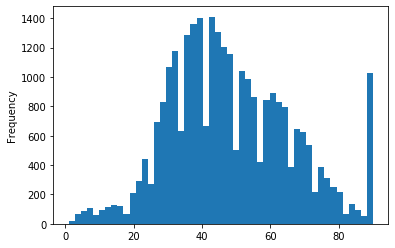

In [11]:
df['age'].plot(kind = 'hist', bins = 50)

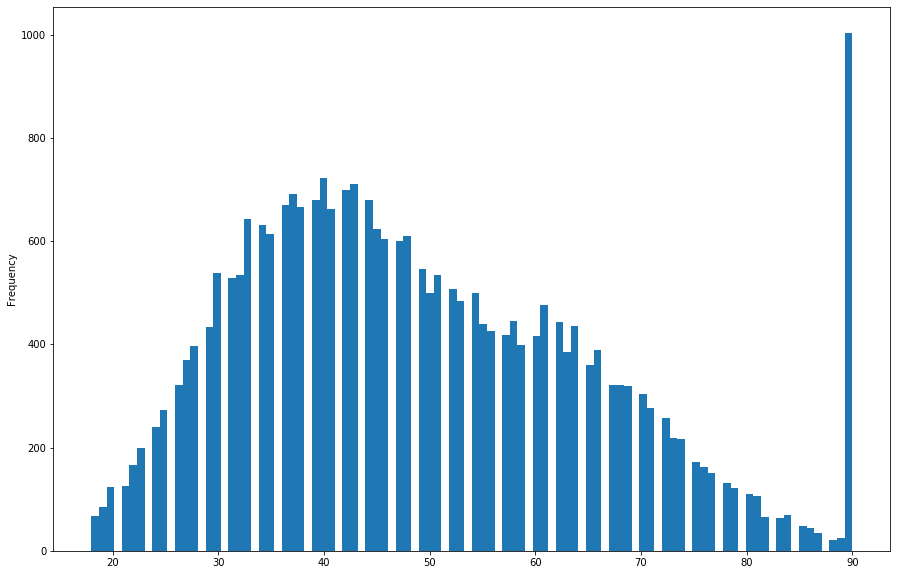

In [12]:
plt.figure(figsize = (15,10))
df.loc[df['age'] >= 18.0]['age'].plot.hist(bins = 100)

In [13]:
def ageCorr(x):
    
    if(x['age'] < 10):
        return x['age']*10
    else:
        return x['age'] + 10

In [14]:
df['age'] = df.apply(lambda x: ageCorr(x) if x['age'] < 18 else x['age'], axis = 1)

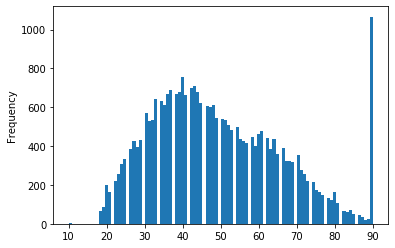

In [15]:
df['age'].plot.hist(bins = 100)

In [16]:
df['age'].value_counts()

90    1066
40     756
43     711
42     699
37     691
      ... 
86      44
87      34
89      24
88      20
10       4
Name: age, Length: 74, dtype: int64

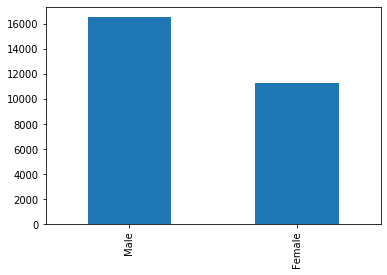

In [17]:
df['gender'].value_counts().plot.bar()

In [18]:
df.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [19]:
df['gender'].fillna(value = 'Male', inplace = True)

In [20]:
df['gender'].isnull().sum()

0

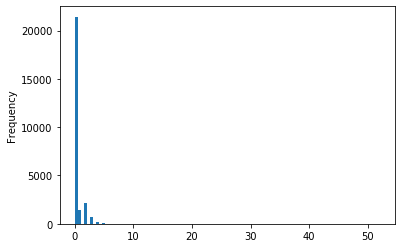

In [21]:
df['dependents'].plot.hist(bins = 100)

In [22]:
df['dependents'].value_counts()/len(df)

0.0     0.755232
2.0     0.075752
1.0     0.049151
3.0     0.024699
4.0     0.006307
5.0     0.001445
6.0     0.000282
7.0     0.000106
36.0    0.000035
52.0    0.000035
25.0    0.000035
9.0     0.000035
50.0    0.000035
32.0    0.000035
8.0     0.000035
Name: dependents, dtype: float64

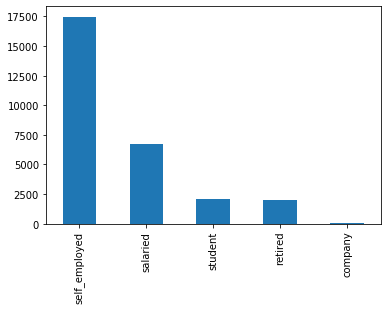

In [23]:
df['occupation'].value_counts().plot.bar()

In [24]:
df['occupation'].fillna(value = 'self_employed', inplace = True)

In [25]:
df['occupation'].isnull().sum()

0

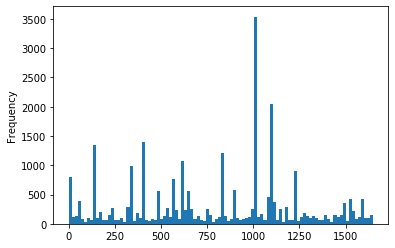

In [26]:
df['city'].plot.hist(bins = 100)

In [27]:
df['city'].fillna(value = df['city'].mode()[0], inplace = True)

In [28]:
df['city'].isnull().sum()

0

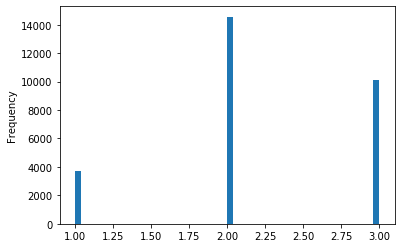

In [29]:
df['customer_nw_category'].plot.hist(bins = 50)

In [30]:
df.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [31]:
df['dependents'].fillna(value = df['dependents'].mode()[0], inplace = True)

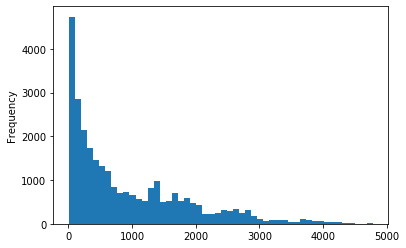

In [32]:
df['branch_code'].plot.hist(bins = 50)

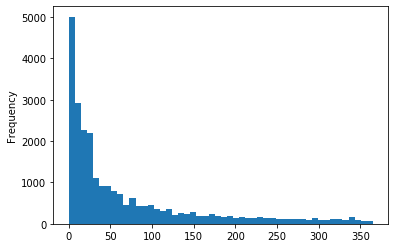

In [33]:
df['days_since_last_transaction'].plot.hist(bins = 50)

In [34]:
df['days_since_last_transaction'].fillna(value = 999, inplace = True)

In [35]:
df.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [36]:
df['churn'].value_counts()/len(df)

0    0.814671
1    0.185329
Name: churn, dtype: float64

In [37]:
df = pd.get_dummies(df)

In [38]:
df.columns

Index(['vintage', 'age', 'dependents', 'city', 'customer_nw_category',
       'branch_code', 'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'gender_Female', 'gender_Male', 'occupation_company',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [39]:
df.dtypes

vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried                 uint8
occupation_self_employed          

In [40]:
features = ['dependents', 'city', 'days_since_last_transaction', 'current_balance', 'previous_month_end_balance',
           'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit',
           'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance']

for i in features:
    print('*****',i,"****")
    print(df[i].value_counts()/len(df))
    print()

***** dependents ****
0.0     0.842013
2.0     0.075752
1.0     0.049151
3.0     0.024699
4.0     0.006307
5.0     0.001445
6.0     0.000282
7.0     0.000106
36.0    0.000035
52.0    0.000035
25.0    0.000035
9.0     0.000035
50.0    0.000035
32.0    0.000035
8.0     0.000035
Name: dependents, dtype: float64

***** city ****
1020.0    0.150870
1096.0    0.071031
409.0     0.047002
146.0     0.045487
834.0     0.040096
            ...   
629.0     0.000035
527.0     0.000035
1212.0    0.000035
530.0     0.000035
70.0      0.000035
Name: city, Length: 1604, dtype: float64

***** days_since_last_transaction ****
999.0    0.113558
0.0      0.058911
3.0      0.029279
14.0     0.023043
4.0      0.022268
           ...   
170.0    0.000035
218.0    0.000035
334.0    0.000035
288.0    0.000035
321.0    0.000035
Name: days_since_last_transaction, Length: 361, dtype: float64

***** current_balance ****
1429.07     0.000211
1428.73     0.000176
1429.14     0.000141
1428.79     0.000141
1428.94   

In [41]:
df = df.astype({'dependents' : 'int', 
           'city': 'int',
           'days_since_last_transaction': 'int'
           })

In [42]:
df.dtypes

vintage                             int64
age                                 int64
dependents                          int32
city                                int32
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction         int32
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried                 uint8
occupation_self_employed          

# Bivariate Analysis

No handles with labels found to put in legend.


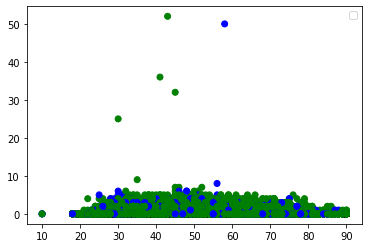

In [43]:
color = {0 : 'green', 1 : 'blue'}
plt.scatter(df['age'], df['dependents'], c = df['churn'].apply(lambda x: color[x]))
plt.legend()
plt.show()

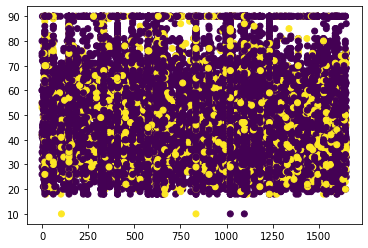

In [44]:
plt.scatter(df['city'], df['age'], c = df['churn'])

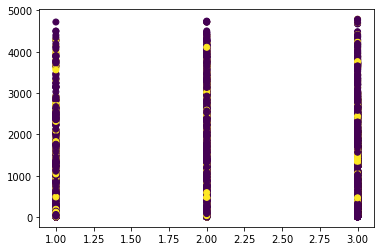

In [45]:
plt.scatter(df['customer_nw_category'], df['branch_code'], c = df['churn'])

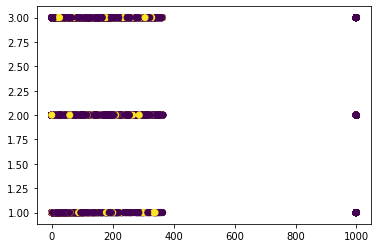

In [46]:
plt.scatter(df['days_since_last_transaction'], df['customer_nw_category'], c = df['churn'])

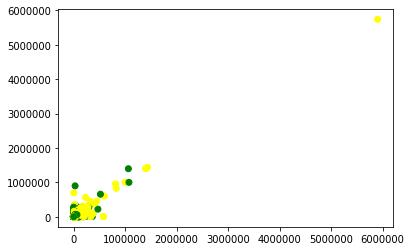

In [47]:
color = {0: 'yellow', 1: 'green'}

plt.scatter(df['current_balance'], df['previous_month_end_balance'], c = df['churn'].apply(lambda x: color[x]))

Text(0, 0.5, 'average_monthly_balance_prevQ2')

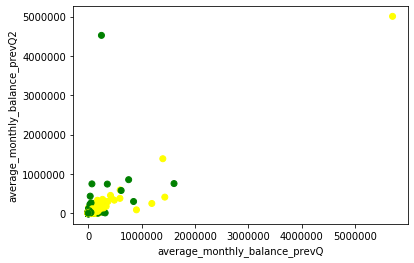

In [48]:
plt.scatter(df['average_monthly_balance_prevQ'], df['average_monthly_balance_prevQ2'], c = df['churn'].apply(lambda x: color[x]))
plt.xlabel('average_monthly_balance_prevQ')
plt.ylabel('average_monthly_balance_prevQ2')

Text(0, 0.5, 'previous_month_credit')

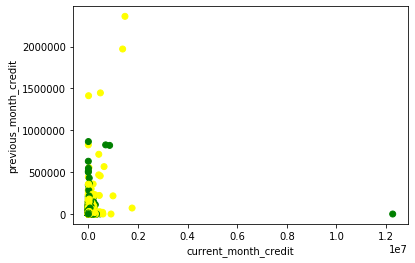

In [49]:
plt.scatter(df['current_month_credit'], df['previous_month_credit'], c = df['churn'].apply(lambda x: color[x]))
plt.xlabel('current_month_credit')
plt.ylabel('previous_month_credit')

Text(0, 0.5, 'previous_month_debit')

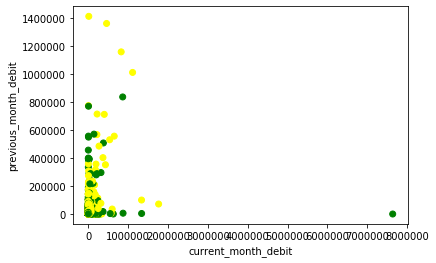

In [50]:
plt.scatter(df['current_month_debit'], df['previous_month_debit'], c = df['churn'].apply(lambda x: color[x]))
plt.xlabel('current_month_debit')
plt.ylabel('previous_month_debit')

Text(0, 0.5, 'previous_month_balance')

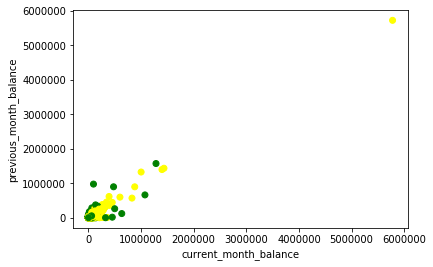

In [51]:
plt.scatter(df['current_month_balance'], df['previous_month_balance'], c = df['churn'].apply(lambda x: color[x]))
plt.xlabel('current_month_balance')
plt.ylabel('previous_month_balance')

# Data Manipulation

In [52]:
df.drop_duplicates(inplace = True)

# Predictive Modelling

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as LOR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import BaggingClassifier as BGC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC 
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score as ras, roc_curve as rc

In [54]:
x = df.drop(['churn'],axis = 1)
y = df['churn']

In [55]:
x = StandardScaler().fit_transform(x)

In [56]:
xtrain, xtest, ytrain, ytest = tts(x, y, random_state = 67, stratify = y, test_size = 0.4)

## Logistic Regression

In [57]:
lor = LOR()
lor.fit(xtrain, ytrain)

C:\Users\ritvik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
ras(ytest, lor.predict_proba(xtest)[:,1])

0.746103216584508

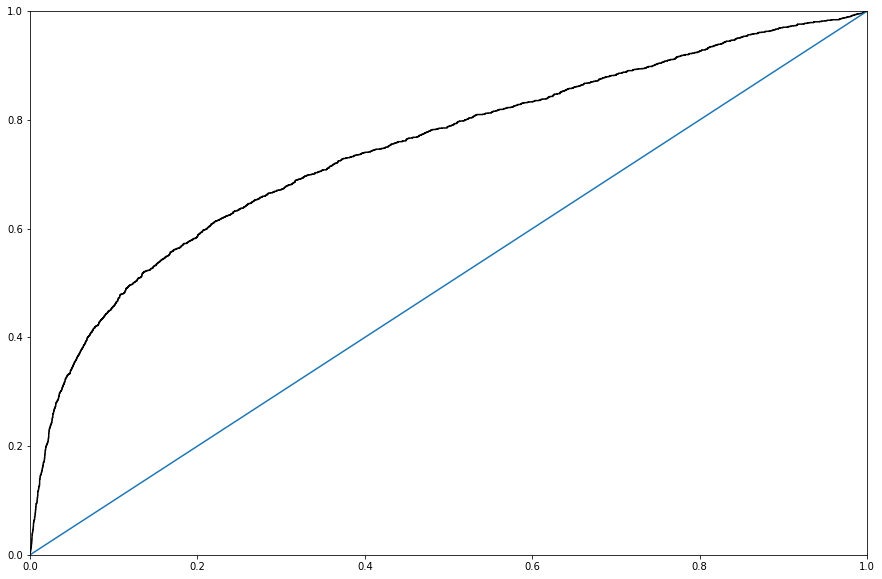

In [59]:
fpr, tpr, _ = rc(ytest, lor.predict_proba(xtest)[:, 1])
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr, c = 'black')
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle = '-')
plt.ylim((0,1))
plt.xlim((0,1))
plt.show()

In [60]:
lor.coef_

array([[-1.94121483e-01, -5.16862157e-02,  2.64307452e-02,
        -4.77793056e-05,  2.31611718e-02, -2.43854619e-02,
        -3.06312462e-01, -5.20863937e+00,  9.19646265e-01,
         3.54573138e+00, -1.02398524e-02, -3.59060380e-01,
        -2.57482043e-01,  4.56637789e-01,  3.17428483e-01,
        -1.16193598e-02, -2.53569334e-01, -2.19473304e-02,
         2.19473304e-02, -2.95269202e-02, -6.20537145e-03,
        -4.58999419e-02,  6.10787556e-02, -2.87961418e-02]])

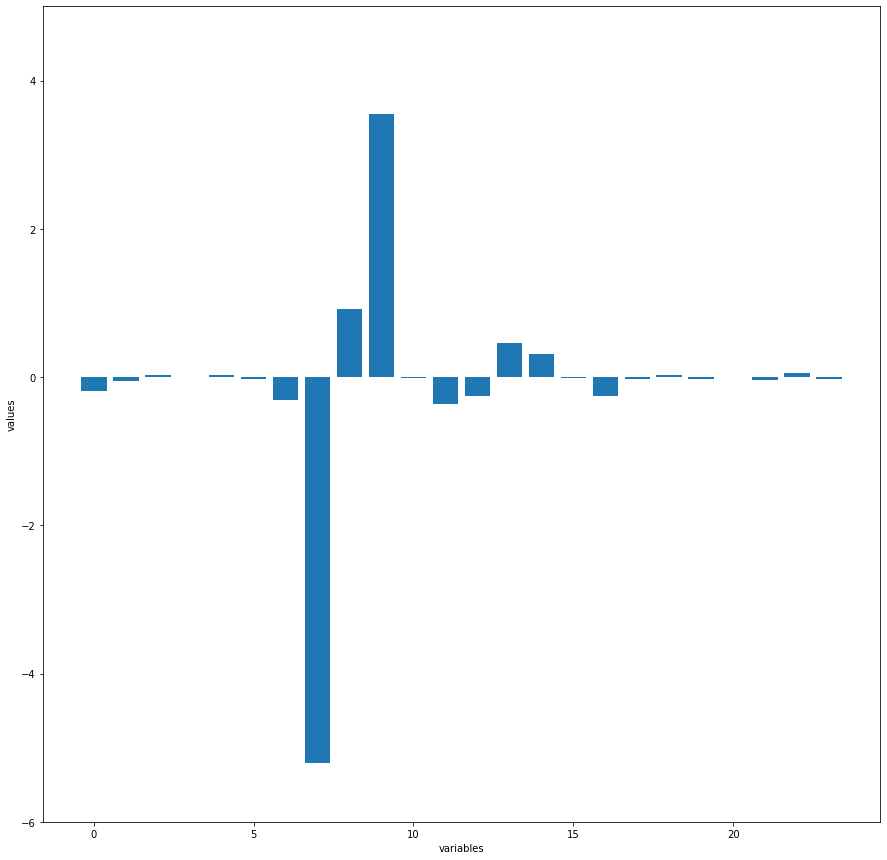

In [61]:
plt.figure(figsize = (15,15))
x = range(xtrain.shape[1])
c = lor.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel('variables')
plt.ylabel('values')
plt.ylim((-6,5))
plt.show()

In [62]:
coeffs = pd.DataFrame({
    'variables' : df.drop(['churn'], axis = 1).columns,
    'coeff' : c
})

coeffs.head()

,variables,coeff
0,vintage,-0.194121
1,age,-0.051686
2,dependents,0.026431
3,city,-0.000048
4,customer_nw_category,0.023161


In [63]:
sig_var = coeffs[coeffs.coeff > 0.5]

In [64]:
subset = df[sig_var['variables'].values]

In [65]:
train_x, test_x, train_y, test_y = tts(subset, y, test_size = 0.4, random_state = 65, stratify = y)

In [66]:
lor.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
ras(test_y, lor.predict_proba(test_x)[:,1])

0.5648199250396816

## Random Forest Classifier

In [68]:
train_scr = []
test_scr = []

for i in range(1,16):
    rfc = RFC(max_depth = i)
    rfc.fit(xtrain, ytrain)
    
    train_scr.append(ras(ytrain, rfc.predict_proba(xtrain)[:,1]))
    test_scr.append(ras(ytest, rfc.predict_proba(xtest)[:,1]))

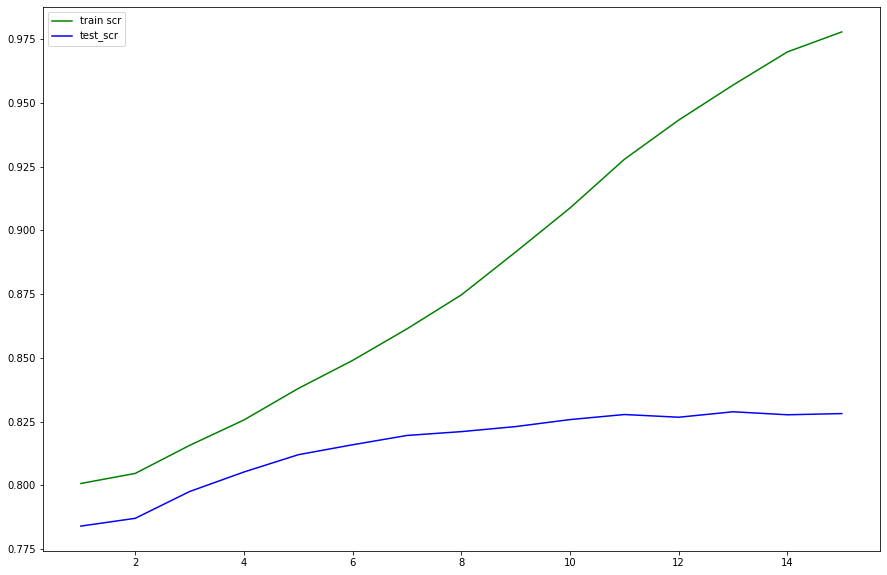

In [69]:
plt.figure(figsize = (15,10))
plt.plot(range(1,16), train_scr, c = 'green', label = 'train scr')
plt.plot(range(1,16), test_scr, c = 'blue', label = 'test_scr')
plt.legend()
plt.show()

- For i = 4 or 5, the RFC seems to be working very well as after that, it is simply overfitting.

In [70]:
rfc = RFC(max_depth = 4)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
ras(ytest, rfc.predict_proba(xtest)[:,1])

0.8063187233888608

In [72]:
rfc.score(xtest, ytest)

0.8432132475997534

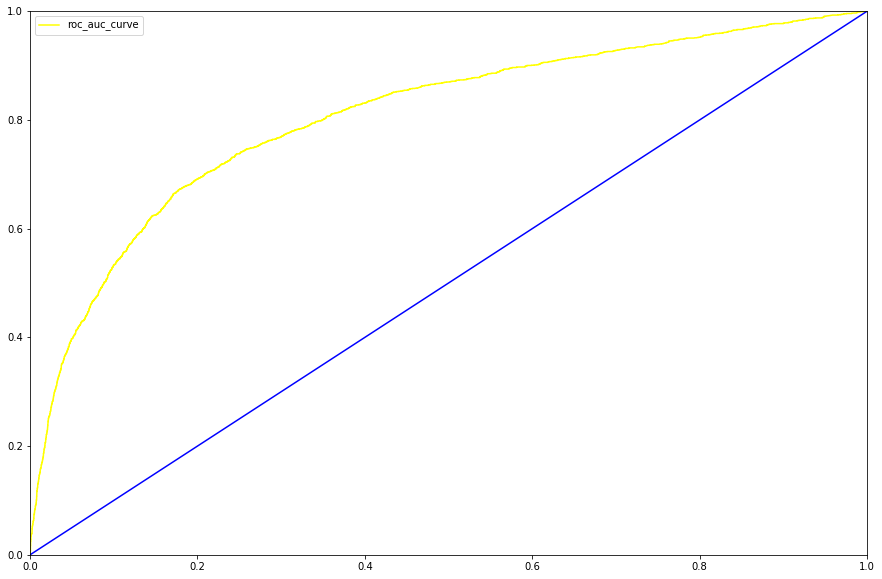

In [73]:
plt.figure(figsize = (15,10))
fpr, tpr, _ = rc(ytest, rfc.predict_proba(xtest)[:,1])
plt.plot(fpr, tpr, c = 'yellow', label = 'roc_auc_curve')
x = np.linspace(0,1,1000)
plt.plot(x,x, c='blue')
plt.ylim((0,1))
plt.xlim((0,1))
plt.legend()
plt.show()

## Bagging,  ExtraTrees,  AdaBoost, GradientBoosting

In [74]:
model = [BGC(), ABC(), ETC(), GBC()]

for i in model:
    i.fit(xtrain, ytrain)
    print('Train roc_auc score:', ras(ytrain, i.predict_proba(xtrain)[:,1]))
    print('Test roc_auc_score:', ras(ytest, i.predict_proba(xtest)[:,1]))
    print()

Train roc_auc score: 0.9993408885620663
Test roc_auc_score: 0.7987320692772459

Train roc_auc score: 0.8466618967992919
Test roc_auc_score: 0.8205801305412939

Train roc_auc score: 1.0
Test roc_auc_score: 0.8042575099065278

Train roc_auc score: 0.869294705081777
Test roc_auc_score: 0.8336498303999158



- From the above 4 models, the Gradient Boosting algorithm has worked the best

## Decision Tree

In [75]:
train_scr = []
test_scr = []

for i in range(1,21):
    dtc = DTC(max_depth = i)
    dtc.fit(xtrain, ytrain)
    
    train_scr.append(ras(ytrain, dtc.predict_proba(xtrain)[:,1]))
    test_scr.append(ras(ytest, dtc.predict_proba(xtest)[:,1]))

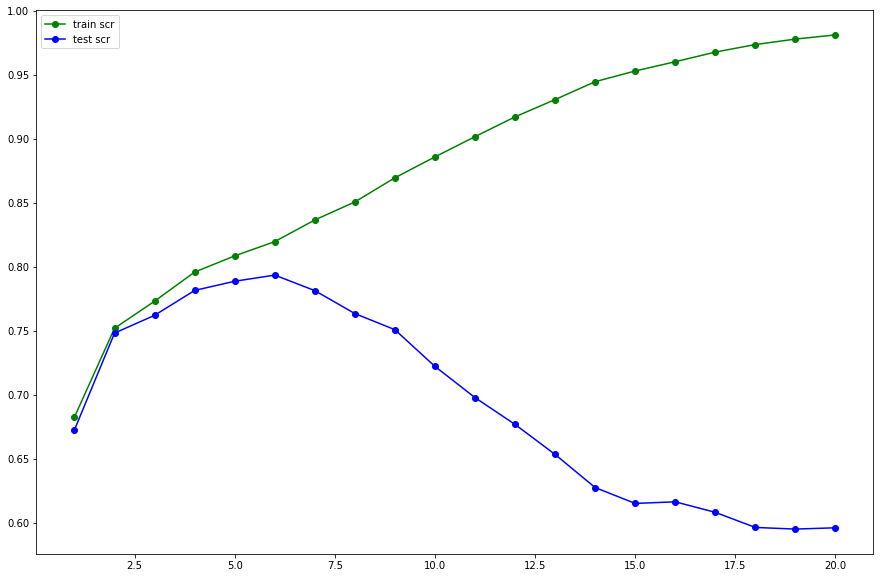

In [76]:
plt.figure(figsize = (15,10))
plt.plot(range(1,21), train_scr, c = 'green', marker = 'o', label = 'train scr')
plt.plot(range(1,21), test_scr, c = 'blue', marker = 'o', label = 'test scr')
plt.legend()
plt.show()

In [77]:
dtc = DTC(max_depth = 4)
dtc.fit(xtrain, ytrain)
ras(ytest, dtc.predict_proba(xtest)[:,1])

0.7815324655383563

## Gaussian Naive Bayes

In [78]:
gnb = GNB()
gnb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
ras(ytest, gnb.predict_proba(xtest)[:,1])

0.6082272741848157

In [80]:
gnb.score(xtest, ytest)

0.8103584955518365

- the difference between accuracy and the roc_auc score is significant

## K-NN

In [81]:
from sklearn.metrics import f1_score as f1s
train_scr = []
test_scr = []

for i in range(1,21):
    knn = KNC(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    
    train_scr.append(1-f1s(ytrain, knn.predict(xtrain)))
    test_scr.append(1-f1s(ytest, knn.predict(xtest)))

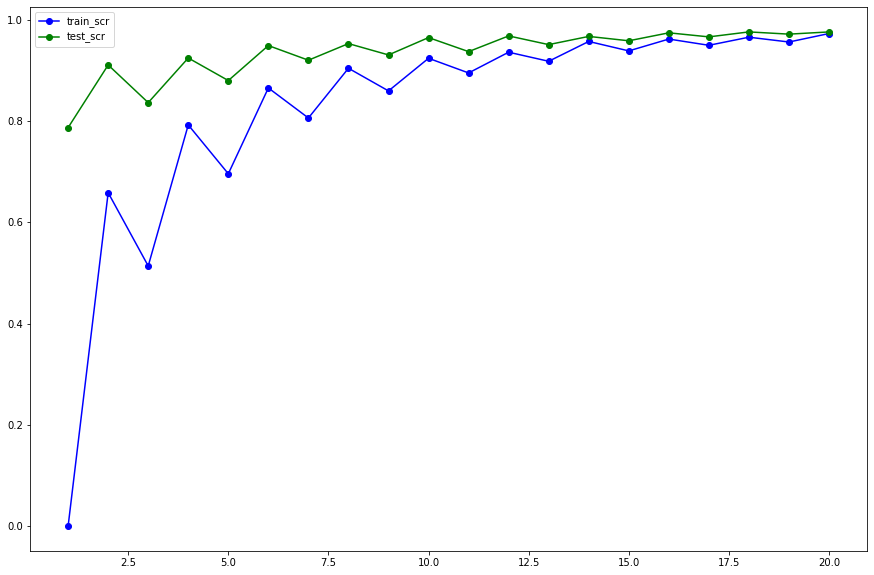

In [82]:
plt.figure(figsize = (15,10))
plt.plot(range(1,21), train_scr, marker = 'o', c = 'blue', label = 'train_scr')
plt.plot(range(1,21), test_scr, marker = 'o', label = 'test_scr', c= 'green')
plt.legend()
plt.show()

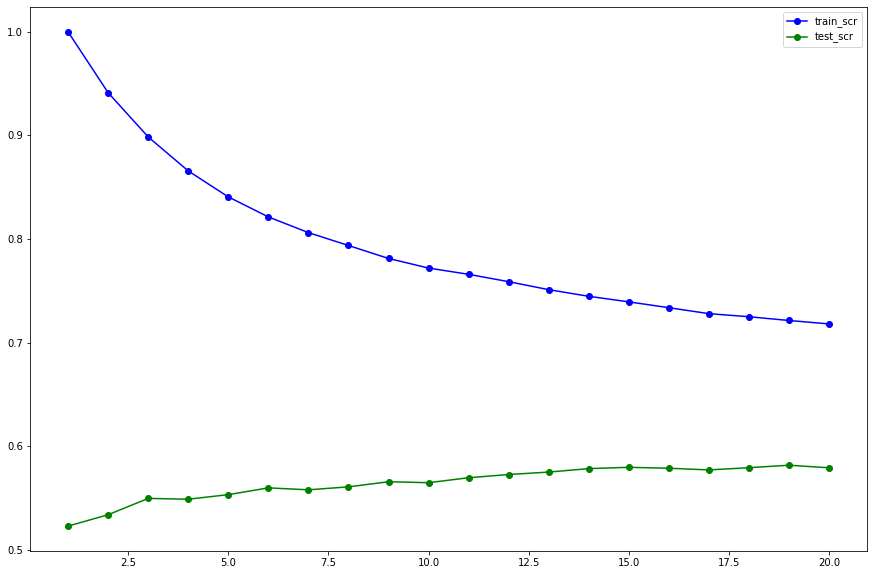

In [91]:
train_scr = []
test_scr = []

for i in range(1,21):
    knn = KNC(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    
    train_scr.append(ras(ytrain, knn.predict_proba(xtrain)[:,1]))
    test_scr.append(ras(ytest, knn.predict_proba(xtest)[:,1]))
    
plt.figure(figsize = (15,10))
plt.plot(range(1,21), train_scr, marker = 'o', c = 'blue', label = 'train_scr')
plt.plot(range(1,21), test_scr, marker = 'o', label = 'test_scr', c= 'green')
plt.legend()
plt.show()

In [93]:
knn = KNC(n_neighbors = 30)
knn.fit(xtrain, ytrain)
ras(ytest, knn.predict_proba(xtest)[:,1])

0.5809844513043647

## SVM

In [83]:
train_scr = []
test_scr = []

for i in range(1,31):
    svc = SVC(C = i/10, probability = True)
    svc.fit(xtrain, ytrain)
    
    train_scr.append(ras(ytrain, svc.predict_proba(xtrain)[:,1]))
    test_scr.append(ras(ytest, svc.predict_proba(xtest)[:,1]))

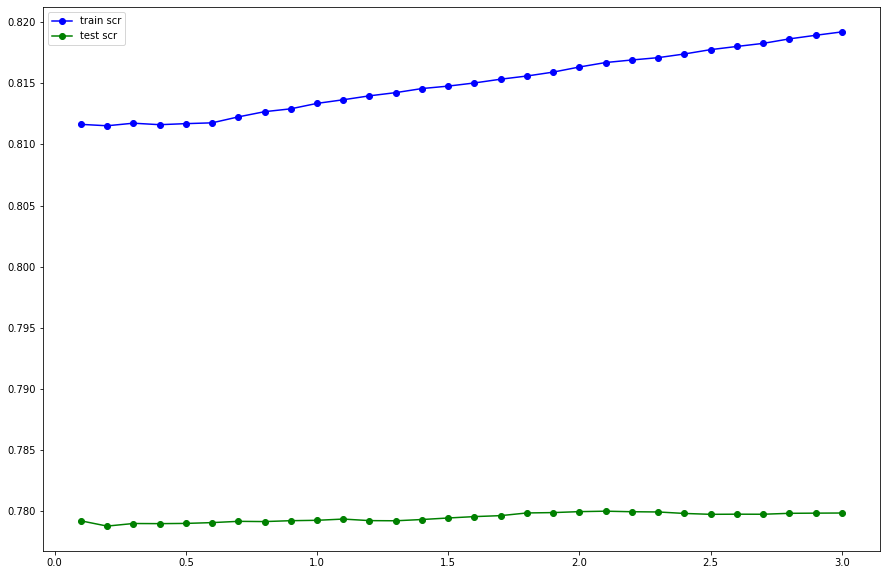

In [88]:
temp = [i/10 for i in range(1,31,1)]
plt.figure(figsize = (15,10))
plt.plot(temp, train_scr, marker = 'o', c = 'blue', label = 'train scr')
plt.plot(temp, test_scr, marker = 'o', c = 'green', label = 'test scr')
plt.legend()
plt.show()

In [90]:
svc = SVC(C = 0.5, probability = True)
svc.fit(xtrain, ytrain)
ras(ytest, svc.predict_proba(xtest)[:,1])

0.7789943481712338